In [43]:
import pandas as pd
import numpy as np
import requests 
import matplotlib.pyplot as plt

In [44]:
start_date = "2025-05-21"
end_date = "2025-08-21"

In [45]:
def get_google_analytics_data(start_date,end_date):
    url="https://n8n.syedd.com/webhook/6e03de77-7003-4900-9a9c-03cfd1f85608"
    body={
        "start_date":start_date,
        "end_date":end_date
    }
    try:
        res = requests.post(url,json=body,headers={"Content-Type":"application/json"})
        res.raise_for_status()  
        # Check if response is empty
        if not res.text.strip():
            print(f"Warning: Empty response from Google Analytics API for dates {start_date} to {end_date}")
            return []
        
        return res.json()
    except requests.exceptions.RequestException as e:
        print(f"Error making request to Google Analytics API: {e}")
        return []
    except ValueError as e:
        print(f"Error parsing JSON from Google Analytics API response: {e}")
        print(f"Response text: {res.text}")
        return []

In [46]:
ga_data = get_google_analytics_data(start_date,end_date)
ga_df = pd.DataFrame(ga_data) if ga_data else pd.DataFrame()

In [47]:
print(ga_df.describe())
print(ga_df.info())

            date             pagePath            sessionSourceMedium  \
count       8119                 8119                           8119   
unique        93                   51                             67   
top     20250818  /live-by-design-new  youtube / rnrvideodescription   
freq         230                 1814                           1335   

       deviceCategory       city         country browser  \
count            8119       8119            8119    8119   
unique              3       1289             109      10   
top            mobile  (not set)  United Kingdom  Chrome   
freq             4796        692            1995    3809   

       sessionManualAdContent continent screenPageViews activeUsers sessions  \
count                    8119      8119            8119        8119     8119   
unique                    232         6              17          11       10   
top                 (not set)    Europe               1           1        1   
freq              

In [48]:
ga_df["screenPageViews"] = ga_df["screenPageViews"].astype(int)
ga_df["averageSessionDuration"] = ga_df["averageSessionDuration"].astype(float)
ga_df["userEngagementDuration"] = ga_df["userEngagementDuration"].astype(float)
ga_df["bounceRate"] = ga_df["bounceRate"].astype(float)
ga_df["sessions"] = ga_df["sessions"].astype(float)
ga_df["totalUsers"] = ga_df["totalUsers"].astype(int)
ga_df["scrolledUsers"] = ga_df["scrolledUsers"].astype(int)
ga_df["activeUsers"] = ga_df["activeUsers"].astype(int)

In [49]:
#convert date to date_time
ga_df["date"] = pd.to_datetime(ga_df["date"])
ga_df = ga_df.sort_values(by="date")
print(ga_df["date"])
ga_df["day_of_week"] = ga_df["date"].dt.day_name()
print(ga_df["day_of_week"])


1488   2025-05-20
1554   2025-05-20
1553   2025-05-20
1552   2025-05-20
1551   2025-05-20
          ...    
7812   2025-08-20
7813   2025-08-20
7814   2025-08-20
7816   2025-08-20
8118   2025-08-20
Name: date, Length: 8119, dtype: datetime64[ns]
1488      Tuesday
1554      Tuesday
1553      Tuesday
1552      Tuesday
1551      Tuesday
          ...    
7812    Wednesday
7813    Wednesday
7814    Wednesday
7816    Wednesday
8118    Wednesday
Name: day_of_week, Length: 8119, dtype: object


In [50]:
#explorining different sources
split = ga_df["sessionSourceMedium"].str.split("/")
ga_df[['source', 'medium']] = ga_df['sessionSourceMedium'].str.split(' / ', expand=True)

ga_df["ad_content"] = ga_df["sessionManualAdContent"]

ga_df = ga_df.drop(columns=["sessionManualAdContent","sessionSourceMedium"])


In [51]:
print(ga_df.describe())
print(ga_df.info())

                                date  screenPageViews  activeUsers  \
count                           8119      8119.000000  8119.000000   
mean   2025-07-06 03:13:08.816356864         1.257051     1.000616   
min              2025-05-20 00:00:00         0.000000     0.000000   
25%              2025-06-12 00:00:00         1.000000     1.000000   
50%              2025-07-07 00:00:00         1.000000     1.000000   
75%              2025-07-30 00:00:00         1.000000     1.000000   
max              2025-08-20 00:00:00        38.000000    14.000000   
std                              NaN         0.960191     0.419263   

          sessions  averageSessionDuration   bounceRate  \
count  8119.000000             8119.000000  8119.000000   
mean      1.127109              105.311375     0.164287   
min       1.000000                0.000000     0.000000   
25%       1.000000                2.588322     0.000000   
50%       1.000000               11.977876     0.000000   
75%       1.000

In [52]:
print(ga_df["pagePath"].value_counts())

pagePath
/live-by-design-new                 1814
/live-by-design-new/                1484
/                                    949
/live-by-design-next-time-ghl        768
/live-by-design                      651
/booking                             346
/vsl                                 277
/vsl-new-2                           274
/qualified-for-mcm-ghl               242
/lbd                                 209
/vsl-new-1                           177
/time-audit                          172
/opt-in                              146
/opt-in-page                          95
/thank-you-page-mcm                   73
/thank-you-page-mcm-ghl               47
/booking-page-new-ghl                 43
/opt-in-page-page                     38
/qualified-for-lbd                    32
/live-by-design-new-ghl               28
/thank-you-page-lbd-ghl               27
/thank-you-8885                       23
/thank-you                            21
/thank-you-2                          19
/qualif

date
2025-05-20    113
2025-05-21     95
2025-05-22    118
2025-05-23     32
2025-05-24     59
             ... 
2025-08-16    169
2025-08-17    165
2025-08-18    306
2025-08-19    123
2025-08-20     88
Name: screenPageViews, Length: 93, dtype: int64


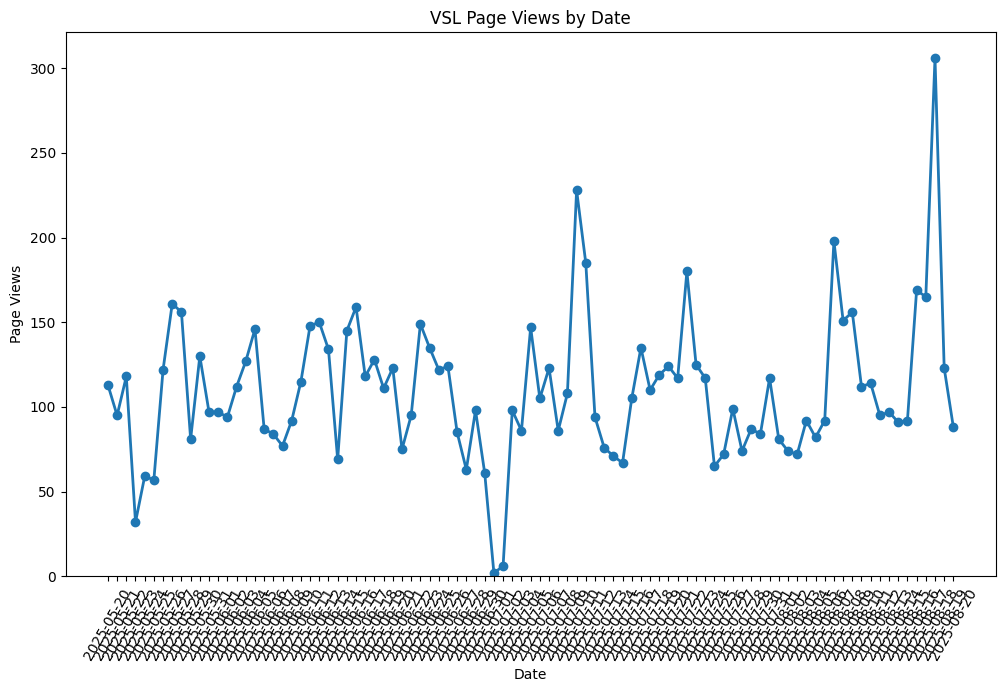

In [53]:
# Group by date only (not datetime)
grouped_by_day = ga_df.groupby(ga_df["date"].dt.date)["screenPageViews"].sum()
print(grouped_by_day)

plt.figure(figsize=(12, 8))

dates = list(grouped_by_day.index)
values = list(grouped_by_day.values)

plt.plot(range(len(dates)), values, marker='o', linewidth=2, markersize=6)

plt.xticks(range(len(dates)), dates, rotation=60)

plt.ylim(bottom=0)

# Add labels and title
plt.xlabel('Date')
plt.ylabel('Page Views')
plt.title('VSL Page Views by Date')

plt.subplots_adjust(bottom=0.2)

plt.show()

pagePath
/                                   1251
//booking-page-new-ghl/                1
//live-by-design-new-ghl/              1
//live-by-design-next-time-ghl/        2
//vsl-new-2/                           1
/booking                             404
/booking-page-new                      9
/booking-page-new-ghl                 55
/booking-page-page-360804             21
/burnout-quiz                          3
/burnout-quiz-1579-page                1
/decisions-page                        1
/landing                              16
/lbd                                 253
/live-by-design                      803
/live-by-design-new                 2394
/live-by-design-new-ghl               36
/live-by-design-new/                1826
/live-by-design-next-time              5
/live-by-design-next-time-ghl        906
/opt-in                              192
/opt-in-page                         122
/opt-in-page-659385                    6
/opt-in-page-page                     50
/qualif

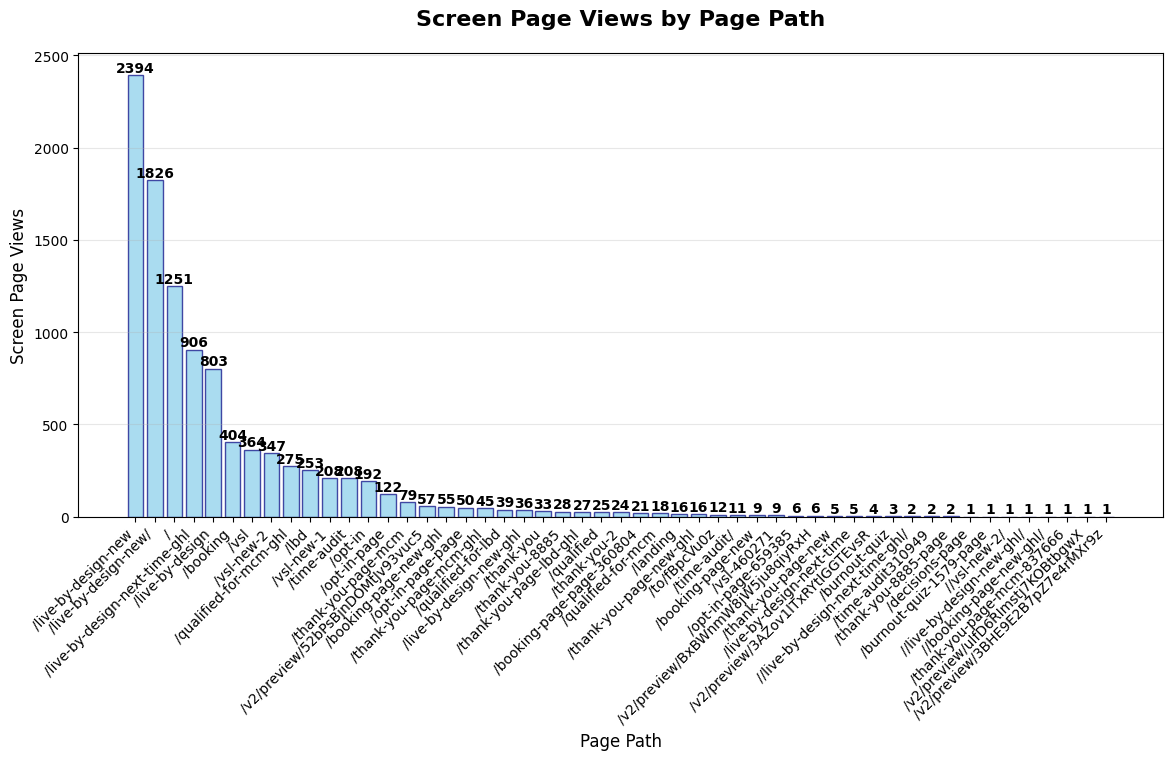

In [54]:
grouped_by_page_views_and_path = ga_df.groupby(["pagePath"])["screenPageViews"].sum()
print(grouped_by_page_views_and_path)

# Create the bar chart
plt.figure(figsize=(14, 8))

sorted_data = grouped_by_page_views_and_path.sort_values(ascending=False)

# Create the bar chart
bars = plt.bar(range(len(sorted_data)), sorted_data.values, color='skyblue', edgecolor='navy', alpha=0.7)

plt.title('Screen Page Views by Page Path', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Page Path', fontsize=12)
plt.ylabel('Screen Page Views', fontsize=12)

plt.xticks(range(len(sorted_data)), sorted_data.index, rotation=45, ha='right')

for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{int(height)}', ha='center', va='bottom', fontweight='bold')

# Set y-axis to start from 0
plt.ylim(bottom=0)

# Add grid for better readability
plt.grid(axis='y', alpha=0.3)

# Adjust layout to prevent label cutoff
plt.subplots_adjust(bottom=0.3)

plt.show()

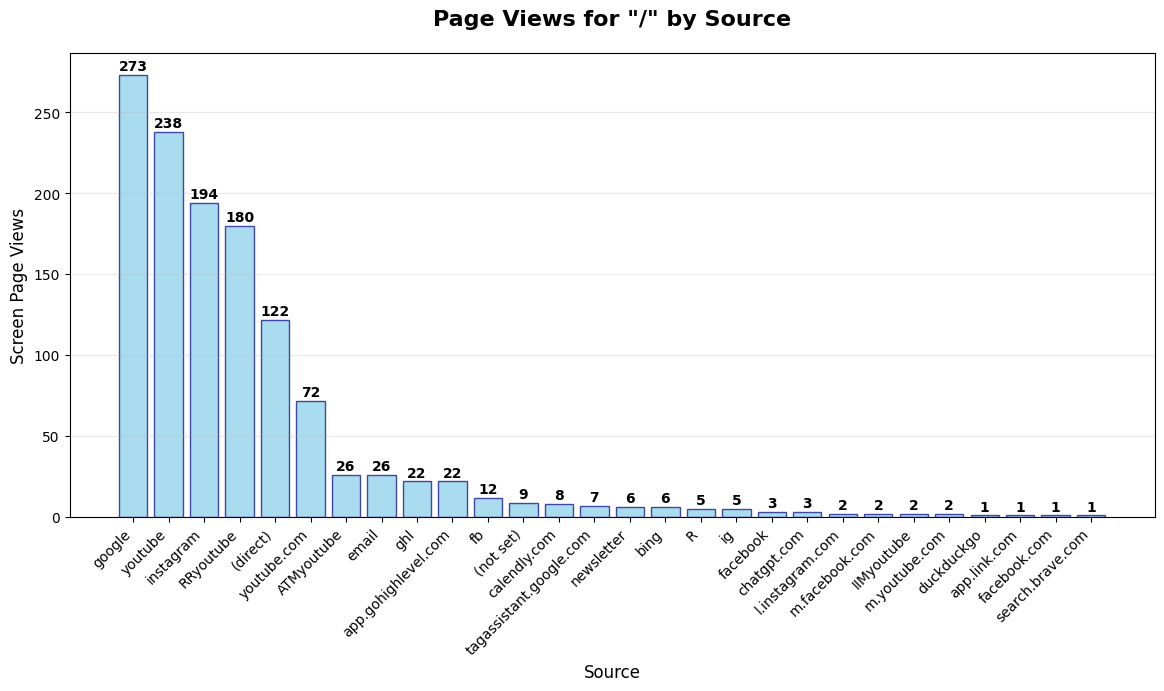

In [55]:
grouped_by_sources = ga_df.groupby(['source',"pagePath"])["screenPageViews"].sum()

plt.figure(figsize=(14, 8))
filtered_data = grouped_by_sources[grouped_by_sources.index.get_level_values('pagePath').isin(['/'])]

sorted_data = filtered_data.sort_values(ascending=False)

# Create the bar chart
bars = plt.bar(range(len(sorted_data)), sorted_data.values, color='skyblue', edgecolor='navy', alpha=0.7)

plt.title('Page Views for "/" by Source', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Source', fontsize=12)
plt.ylabel('Screen Page Views', fontsize=12)

# Extract only the source names for x-axis labels
source_labels = [source for source, page in sorted_data.index]
plt.xticks(range(len(sorted_data)), source_labels, rotation=45, ha='right')

for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{int(height)}', ha='center', va='bottom', fontweight='bold')

# Set y-axis to start from 0
plt.ylim(bottom=0)

# Add grid for better readability
plt.grid(axis='y', alpha=0.3)

# Adjust layout to prevent label cutoff
plt.subplots_adjust(bottom=0.3)

plt.show()

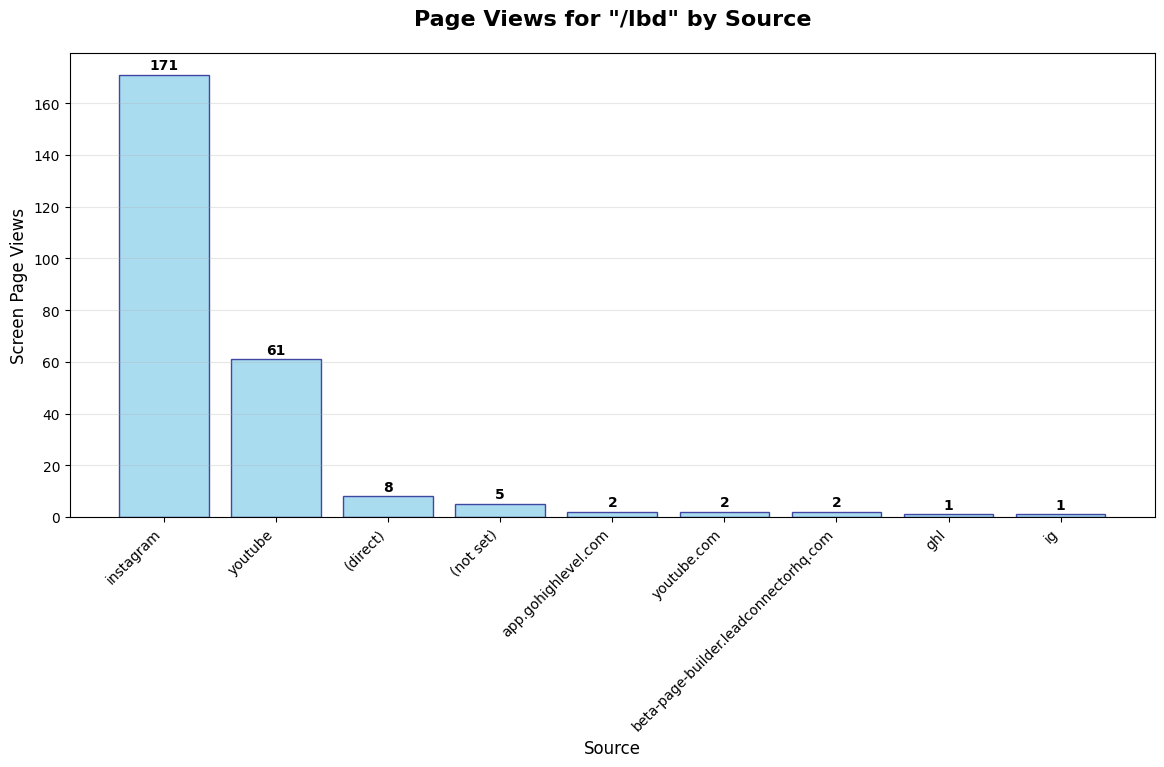

In [56]:
grouped_by_sources = ga_df.groupby(['source',"pagePath"])["screenPageViews"].sum()

plt.figure(figsize=(14, 8))
filtered_data = grouped_by_sources[grouped_by_sources.index.get_level_values('pagePath').isin(['/lbd'])]

sorted_data = filtered_data.sort_values(ascending=False)

# Create the bar chart
bars = plt.bar(range(len(sorted_data)), sorted_data.values, color='skyblue', edgecolor='navy', alpha=0.7)

plt.title('Page Views for "/lbd" by Source', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Source', fontsize=12)
plt.ylabel('Screen Page Views', fontsize=12)

# Extract only the source names for x-axis labels
source_labels = [source for source, page in sorted_data.index]
plt.xticks(range(len(sorted_data)), source_labels, rotation=45, ha='right')

for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{int(height)}', ha='center', va='bottom', fontweight='bold')

# Set y-axis to start from 0
plt.ylim(bottom=0)

# Add grid for better readability
plt.grid(axis='y', alpha=0.3)

# Adjust layout to prevent label cutoff
plt.subplots_adjust(bottom=0.3)

plt.show()

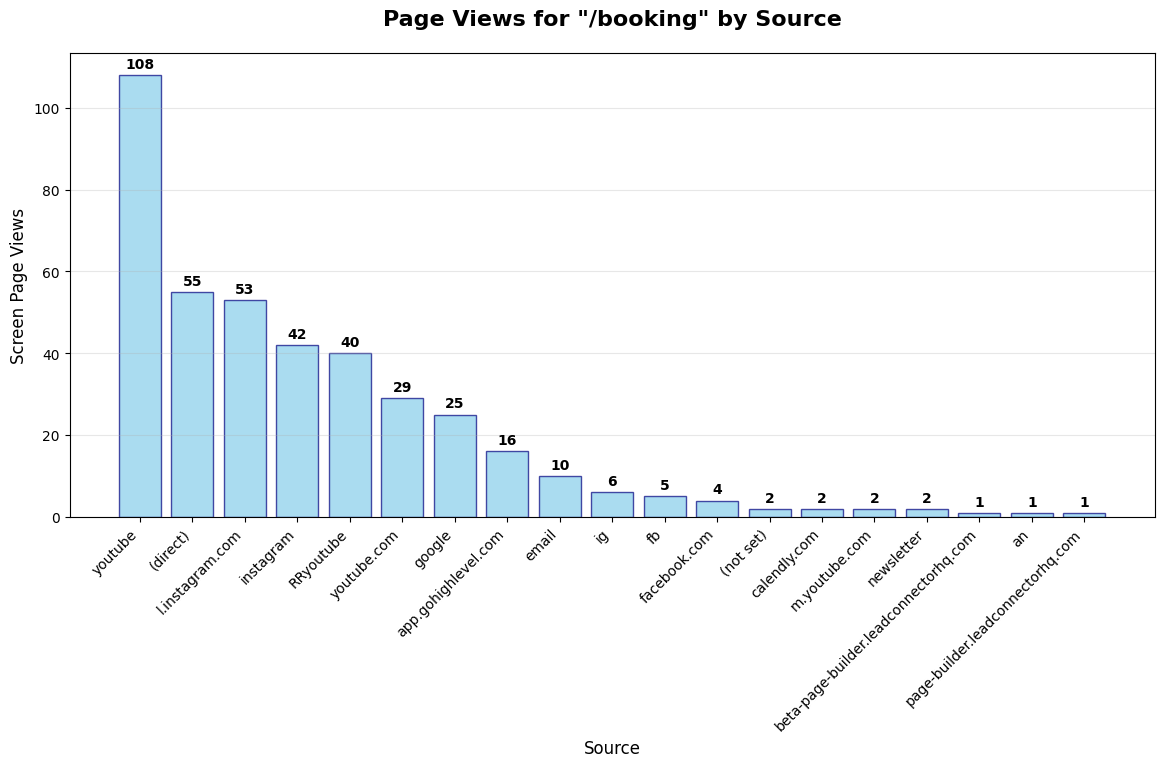

In [57]:
grouped_by_sources = ga_df.groupby(['source',"pagePath"])["screenPageViews"].sum()

plt.figure(figsize=(14, 8))
filtered_data = grouped_by_sources[grouped_by_sources.index.get_level_values('pagePath').isin(['/booking'])]

sorted_data = filtered_data.sort_values(ascending=False)

# Create the bar chart
bars = plt.bar(range(len(sorted_data)), sorted_data.values, color='skyblue', edgecolor='navy', alpha=0.7)

plt.title('Page Views for "/booking" by Source', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Source', fontsize=12)
plt.ylabel('Screen Page Views', fontsize=12)

# Extract only the source names for x-axis labels
source_labels = [source for source, page in sorted_data.index]
plt.xticks(range(len(sorted_data)), source_labels, rotation=45, ha='right')

for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{int(height)}', ha='center', va='bottom', fontweight='bold')

# Set y-axis to start from 0
plt.ylim(bottom=0)

# Add grid for better readability
plt.grid(axis='y', alpha=0.3)

# Adjust layout to prevent label cutoff
plt.subplots_adjust(bottom=0.3)

plt.show()

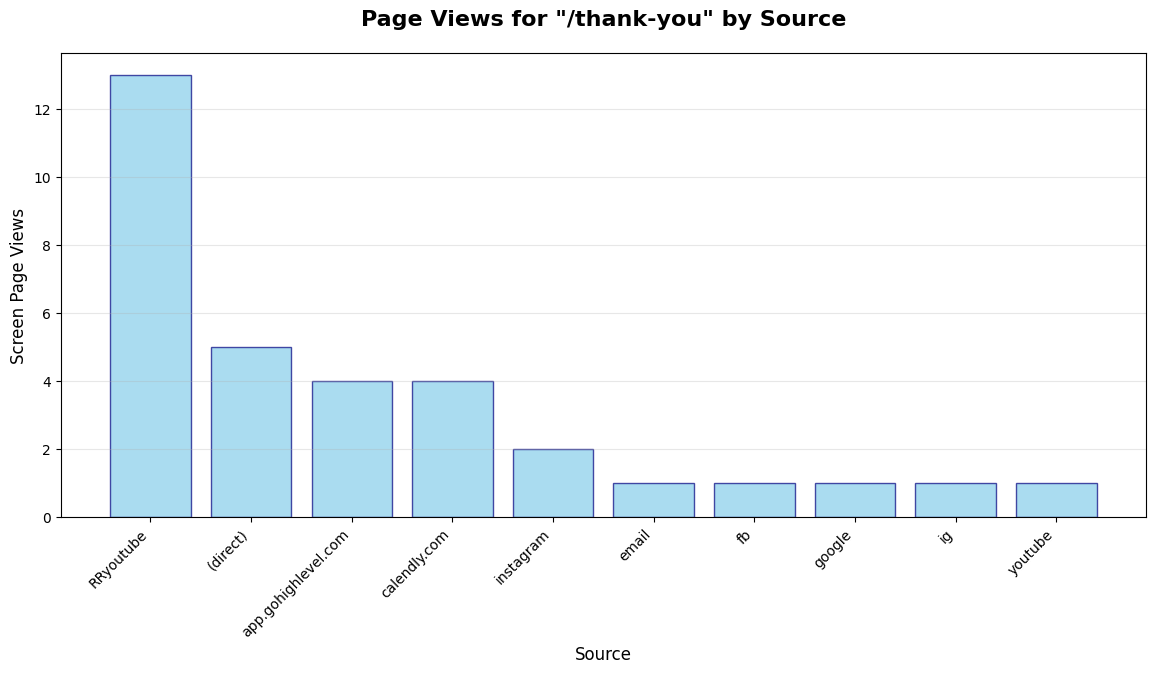

In [58]:
grouped_by_sources = ga_df.groupby(['source',"pagePath"])["screenPageViews"].sum()

plt.figure(figsize=(14, 8))
filtered_data = grouped_by_sources[grouped_by_sources.index.get_level_values('pagePath').isin(['/thank-you'])]

sorted_data = filtered_data.sort_values(ascending=False)

# Create the bar chart
bars = plt.bar(range(len(sorted_data)), sorted_data.values, color='skyblue', edgecolor='navy', alpha=0.7)

plt.title('Page Views for "/thank-you" by Source', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Source', fontsize=12)
plt.ylabel('Screen Page Views', fontsize=12)

# Extract only the source names for x-axis labels
source_labels = [source for source, page in sorted_data.index]
plt.xticks(range(len(sorted_data)), source_labels, rotation=45, ha='right')


# Set y-axis to start from 0
plt.ylim(bottom=0)

# Add grid for better readability
plt.grid(axis='y', alpha=0.3)

# Adjust layout to prevent label cutoff
plt.subplots_adjust(bottom=0.3)

plt.show()

pagePath
/             124.678790
/booking       68.653350
/lbd           71.614953
/thank-you    396.105648
Name: averageSessionDuration, dtype: float64


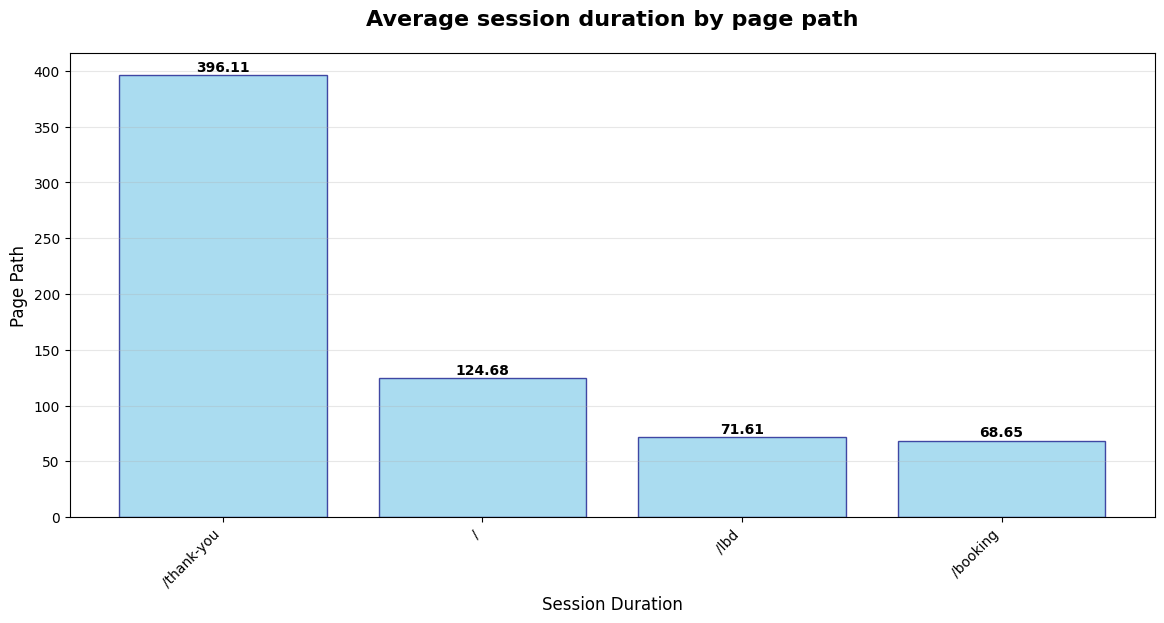

In [59]:
avg_session_duration_by_page_path = ga_df.groupby("pagePath")["averageSessionDuration"].mean()

plt.figure(figsize=(14, 8))
filtered_data = avg_session_duration_by_page_path[avg_session_duration_by_page_path.index.get_level_values('pagePath').isin(['/lbd','/','/booking','/thank-you'])]
print(filtered_data)
sorted_data = filtered_data.sort_values(ascending=False)

# Create the bar chart
bars = plt.bar(range(len(sorted_data)), sorted_data.values, color='skyblue', edgecolor='navy', alpha=0.7)

plt.title('Average session duration by page path', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Session Duration', fontsize=12)
plt.ylabel('Page Path', fontsize=12)

# Extract only the source names for x-axis labels
plt.xticks(range(len(sorted_data)), sorted_data.index, rotation=45, ha='right')
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{float(height):.2f}', ha='center', va='bottom', fontweight='bold')

# Set y-axis to start from 0
plt.ylim(bottom=0)

# Add grid for better readability
plt.grid(axis='y', alpha=0.3)

# Adjust layout to prevent label cutoff
plt.subplots_adjust(bottom=0.3)

plt.show()

           date                       pagePath deviceCategory           city  \
4946 2025-07-11                              /        desktop         London   
5234 2025-07-15      /live-by-design-next-time        desktop  Milton Keynes   
5459 2025-07-18      /live-by-design-next-time        desktop      (not set)   
5719 2025-07-22                              /        desktop      Ashbourne   
1242 2025-08-01            /live-by-design-new        desktop        Nairobi   
6361 2025-08-01                       /landing        desktop        Nairobi   
1250 2025-08-01                           /vsl        desktop        Nairobi   
6351 2025-08-01                              /        desktop        Nairobi   
6390 2025-08-01  /live-by-design-next-time-ghl        desktop        Nairobi   
6396 2025-08-01                    /time-audit        desktop        Nairobi   
8085 2025-08-11                              /        desktop        Nairobi   

             country browser continent 

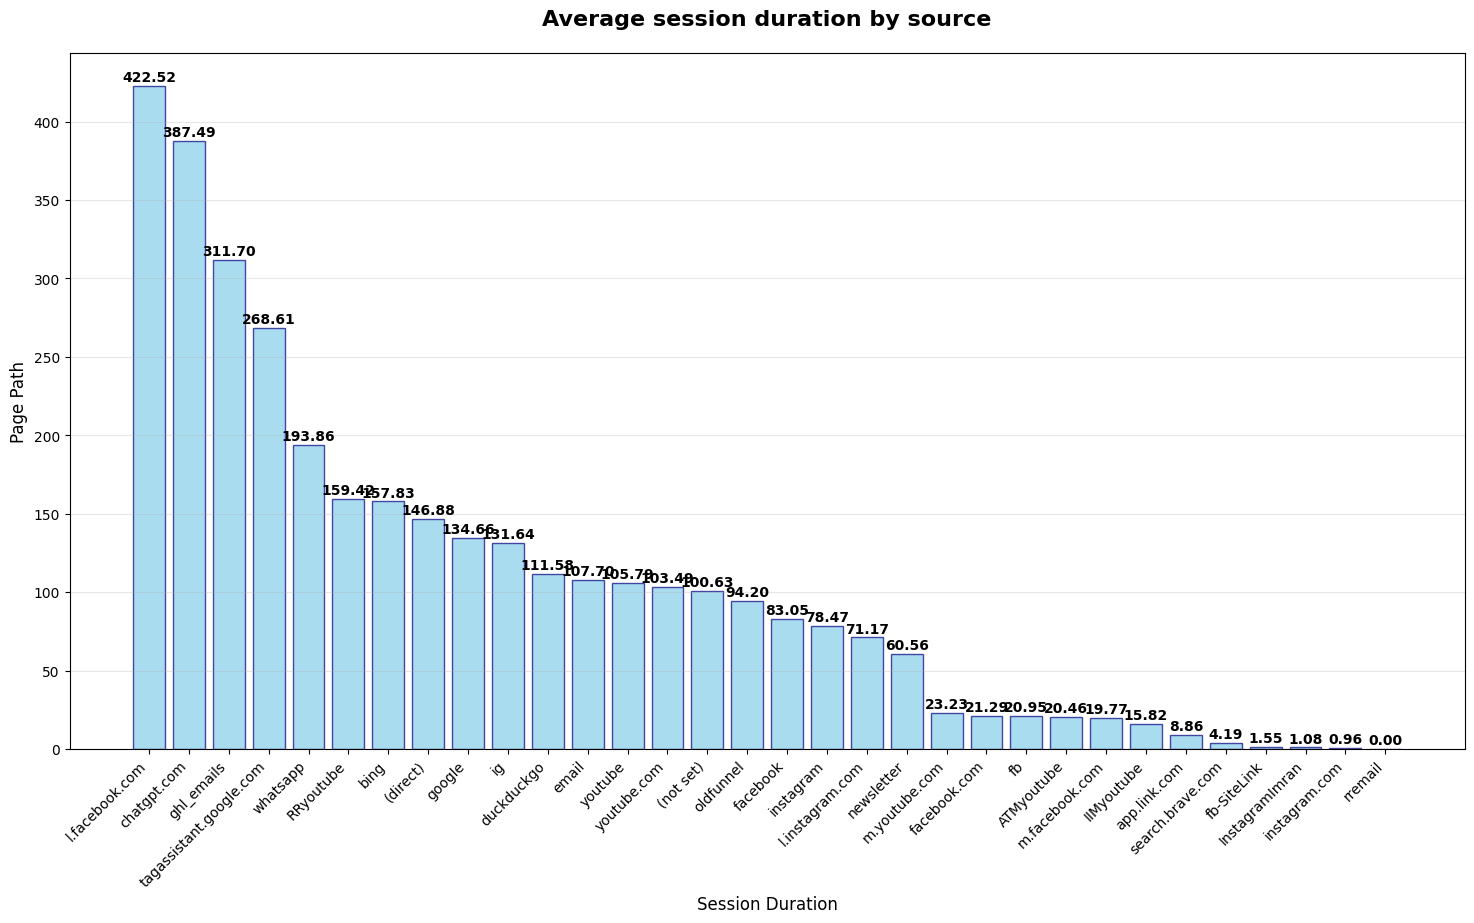

In [60]:
ga_df = ga_df[(ga_df["source"] != "ghl") & (ga_df["source"]!="app.gohighlevel.com") & (ga_df["source"] != "beta-page-builder.leadconnectorhq.com") & (ga_df["source"] != "calendly.com") & (ga_df["source"]!= "page-builder.leadconnectorhq.com") & (ga_df["source"]!= "api.leadconnectorhq.com")
              & (ga_df["source"]!= "R") & (ga_df["source"]!= "an") & (ga_df["source"]!= "xxxxx")]

print(ga_df[ga_df["source"]=="chatgpt.com"])
avg_session_duration_by_page_path = ga_df.groupby("source")["averageSessionDuration"].mean()

plt.figure(figsize=(18, 12))
filtered_data = avg_session_duration_by_page_path
print(filtered_data)
sorted_data = filtered_data.sort_values(ascending=False)

# Create the bar chart
bars = plt.bar(range(len(sorted_data)), sorted_data.values, color='skyblue', edgecolor='navy', alpha=0.7)

plt.title('Average session duration by source', fontsize=16, fontweight='bold', pad=20)
plt.xlabel('Session Duration', fontsize=12)
plt.ylabel('Page Path', fontsize=12)

# Extract only the source names for x-axis labels
plt.xticks(range(len(sorted_data)), sorted_data.index, rotation=45, ha='right')
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{float(height):.2f}', ha='center', va='bottom', fontweight='bold')

# Set y-axis to start from 0
plt.ylim(bottom=0)

# Add grid for better readability
plt.grid(axis='y', alpha=0.3)

# Adjust layout to prevent label cutoff
plt.subplots_adjust(bottom=0.3)

plt.show()

ad_content
-d6Y0iFK1WM                                             583
yt_channel_profile                                      379
youtu.be/-d6Y0iFK1WM                                    308
fcdesc_oxDWKAX4goI                                      236
7tf_DX21t0A                                             167
                                                       ... 
talha-testimonial-----------------------------------      1
talha_caseStudy                                           1
zAz2WtrdcMY                                               1
zakariya_ali                                              1
ziad                                                      1
Name: screenPageViews, Length: 188, dtype: int64


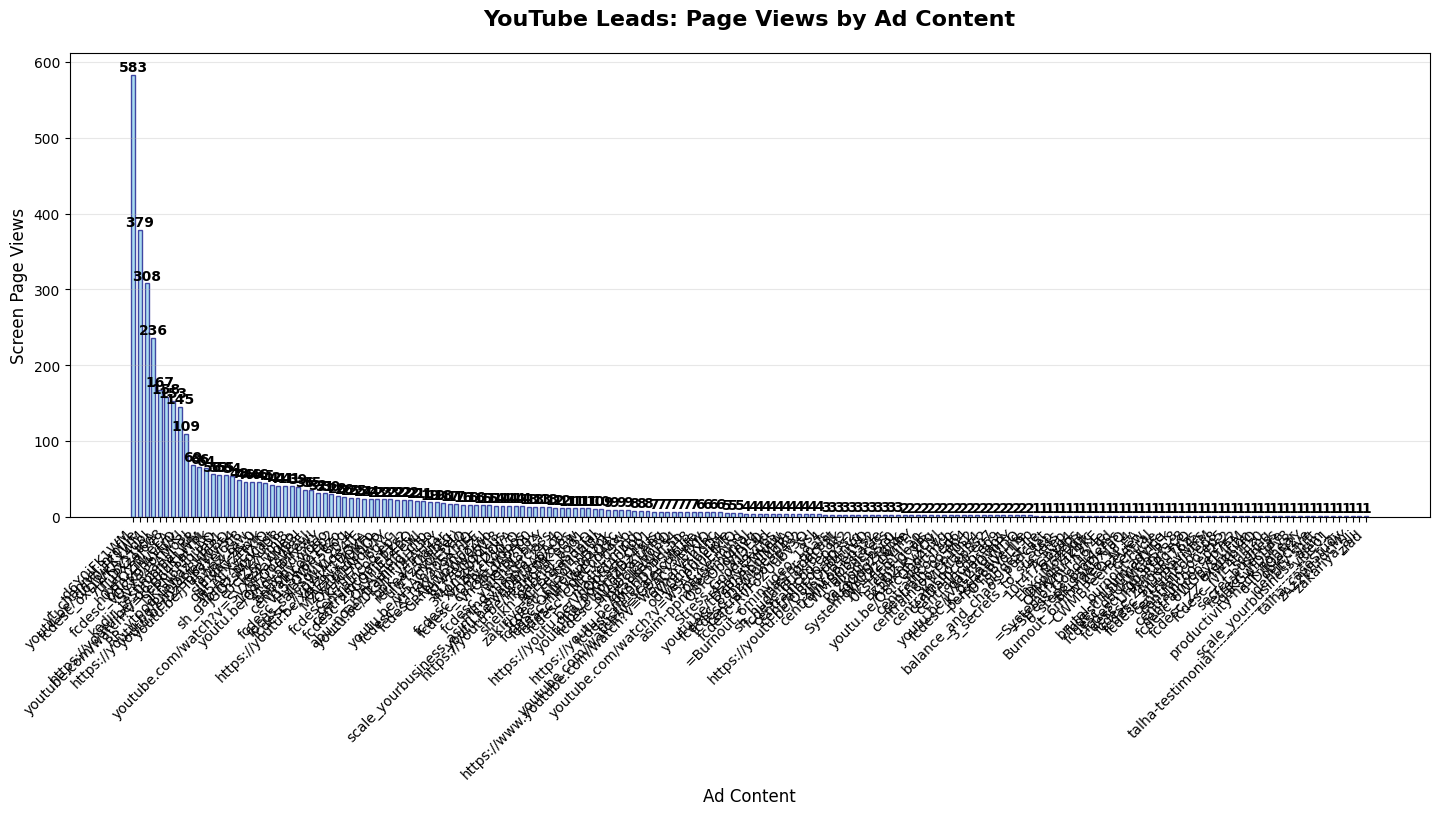

In [ ]:
youtube_leads = ga_df[ga_df["source"] == "youtube"]

# print(youtube_leads["pagePath"].value_counts())
# youtube_leads = youtube_leads[
#     (youtube_leads["pagePath"]!="/booking") & (youtube_leads["pagePath"]!="/live-by-design-next-time-ghl") &
#     (youtube_leads["pagePath"]!="/thank-you-page-mcm") & (youtube_leads["pagePath"]!="/thank-you-page-mcm-ghl") &                        
#     (youtube_leads["pagePath"]!="/booking-page-new-ghl") & (youtube_leads["pagePath"]!="/qualified-for-lbd") &
#     (youtube_leads["pagePath"]!="/time-audit/") & (youtube_leads["pagePath"]!="/qualified") &
#     (youtube_leads["pagePath"]!="/thank-you-page-lbd-ghl") & (youtube_leads["pagePath"]!="/thank-you-page-new-ghl")
#     (youtube_leads["pagePath"]!="/live-by-design-next-time-ghl") & (youtube_leads["pagePath"]!="/thank-you-page-mcm")
#     (youtube_leads["pagePath"]!="/time-audit") & (youtube_leads["pagePath"]!="/thank-you-page-new-ghl")

                          
#                               ]


youtube_content_by_page_views = youtube_leads.groupby(["ad_content"])["screenPageViews"].sum().sort_values(ascending=False)
youtube_content_by_page_views.reset_index().to_csv("output/youtube_content_detailed.csv", index=False)
print(youtube_content_by_page_views.sum())

# Create a larger figure with more width
plt.figure(figsize=(16, 8))

# Create the bar chart with custom width
bars = plt.bar(range(len(youtube_content_by_page_views)), 
               youtube_content_by_page_views.values, 
               width=0.6,  # Make bars narrower to spread them out more
               color='skyblue', 
               edgecolor='navy', 
               alpha=0.7)

# Set x-axis labels with rotation for better readability
plt.xticks(range(len(youtube_content_by_page_views)), 
           youtube_content_by_page_views.index, 
           rotation=45, 
           ha='right')

# Add labels and title
plt.xlabel('Ad Content', fontsize=12)
plt.ylabel('Screen Page Views', fontsize=12)
plt.title('YouTube Leads: Page Views by Ad Content', fontsize=16, fontweight='bold', pad=20)

# Add value labels on top of bars
for i, bar in enumerate(bars):
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 1,
             f'{int(height)}', ha='center', va='bottom', fontweight='bold')

# Set y-axis to start from 0
plt.ylim(bottom=0)

# Add grid for better readability
plt.grid(axis='y', alpha=0.3)

# Adjust layout to prevent label cutoff
plt.subplots_adjust(bottom=0.3, left=0.1, right=0.95)

plt.show()